# MAC0460/MAC5832 (2020)
## EP1 -- Perceptron: toy example

Seja um conjunto de treinamento $X = \{ (\mathbf{x}^{(1)},y^{(1)}), (\mathbf{x}^{(2)},y^{(2)}), \ldots, (\mathbf{x}^{(N)},y^{(N)})\}$, $\mathbf{x}^{(i)} \in \mathbb{R}^d$ e $y^{(i)} \in \{-1, +1\}$, $i=1,2,\ldots,N$, linearmente separáveis. Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}^d$, seja $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

O perceptron determina um vetor de pesos $\mathbf{w} \in \mathbb{R}^{1+d}$ de tal forma que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}^{(i)}) = y^{(i)}$, $\forall i$, na qual 
$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{se $z \geq 0$,}\\ -1, & \mbox{se $z < 0$.}\\
\end{array}\right.
$$

O objetivo deste EP é implementar o algoritmo perceptron para dados em $\mathbb{R}^2$ e testá-lo em casos com poucos exemplos. 


### 1. Gerar os pontos e uma target function
- o dataset consistirá de alguns ($N$) pontos definidos a mão. Alguns desses pontos serão os vértices do quadrado $[0,1]\times[0,1]$
- definiremos uma reta $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$ que corta o quadrado $[0,1]\times [0,1]$
- aqui vamos plotar esses pontos de tal forma que os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) \geq 0$ (<font color="blue">positivo</font>) são plotados em <font color="blue">azul</font> e os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) < 0$ (<font color="red">negativo</font>) são plotados em <font color="red">vermelho</font>
- a classe de cada um dos $N$ pontos será portanto dado pelo sinal de $f$ 

Shape of array X:  (5, 2)
Number of examples:  5
Shape of array Xe:  (5, 3)
Target weight array:  [ 0.5 -1.   1. ]
Shape of array y:  (5,)
['red', 'blue', 'blue', 'red', 'blue']


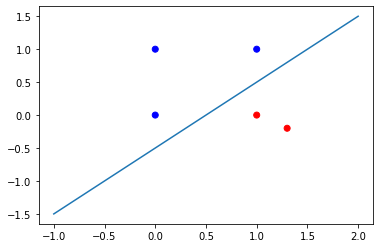

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from IPython import display
#%matplotlib notebook

X = np.asarray([[1.3, -0.2],[0,0],[0,1],[1,0],[1,1]])
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended
Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )
print("Shape of array Xe: ", Xe.shape)

# define a target weight vector
w_target = np.asarray([0.5, -1, 1])
print("Target weight array: ", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)

# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print(colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors);

        


### Chutar uma hipótese inicial

Aqui iremos considerar um peso inicial para a função linear que sabidamente não é a função target e iremos plotar um gráfico dos exemplos com a seguinte convenção:

Cor indica o <i>ground-truth</i> (definido pela função target acima): <font color="blue">positivo</font> e <font color="red">negativo</font>  
Formato do marcador:
- o : classificados corretamente pela hipótese<br>
- x : classificados incorretamente pela hipótese<br>


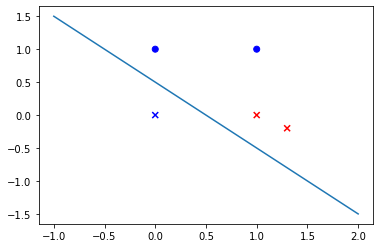

In [2]:
# Dada uma hipótese qualquer, se o sinal coincidir com o original,
# desenha-se bola, se não coincidir, desenha-se x. A cor identifica
# a classificação correta (ground-truth)

# vetor de pesos inicial
w0 = np.asarray([-0.5, 1 , 1])

# calcular yhat
yhat = np.sign(np.dot(Xe,w0))

# misclassifications
misclassified = np.where(y != yhat)[0]
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]


# plotting
a = -w0[1] / w0[2] # slope
b = -w0[0] / w0[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(Xe[correct,1],Xe[correct,2],c=colors_o, marker='o');
plt.scatter(Xe[misclassified,1],Xe[misclassified,2],c=colors_x, marker='x');


# O algoritmo perceptron

Escreva abaixo o seu código para o algoritmo PERCEPTRON. 

Escreva a função e em seguida teste a função com os dados X, y e w0 definidos nos blocos acima.  Faça ao menos um plot do resultado final (pontos e a reta final) seguindo as cores e marcas (x, o) de acordo com a convenção acima.

<b>Opcional</b>: faça uma animação, mostrando como a reta vai mudando ao longo das iterações.

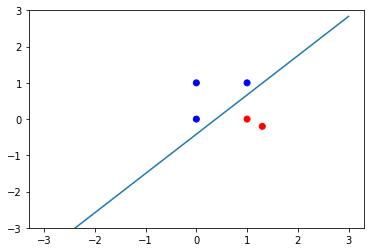

The correct weight was:
 [ 0.5 -1.   1. ] 
but we found in 6 iterations:
 [ 0.5 -1.3  1.2]


In [3]:
def rand_weight_generator(dim, select='uniform'):
    '''
    Generate a dim + 1  random vector with
    selected distribution
    '''
    if select=='uniform':
        w0 = np.random.rand(dim + 1)
        w0 = 2*w0 - 1
    elif select=='normal':
        w0 = np.random.randn(dim + 1)
    return w0

def perceptron(Xe, y, w0=rand_weight_generator(Xe.shape[1] - 1), animation=True):
    """
    Esse algoritmo gera um peso inicial aleatório se nenhum w0 for passado
    Parameters:
       Xe : ndarray (N,d+1) - it already has the 1's in column 1
       y  : ndarray (N,)
       w0 : ndarray (d+1,) - the initial weight vector
       
    Returns:
       w : ndarray (d+1,) - the final weight vector
       num_iter : the number of iterations
    """
    
    # write your PERCEPTRON algorithm code here
    num_iter = 0
    wrong_weight = True
    plot(Xe, y, w0)
    while wrong_weight:
        num_iter += 1
        for i in range(0, Xe.shape[0]):
            wrong_weight = False
            if y[i] != np.sign(np.dot(w0, Xe[i])):
                wrong_weight = True
                w0 = w0 + y[i]*Xe[i]                
                if animation is True:
                    plot(Xe, y, w0)
                # print('First wrong point is: ', i, '. New weight is: ', w0)
                break
    plot(Xe, y, w0)
    w = w0
    return w, num_iter
# test your function for w0, X and y as defined above
# Print the final weight vector and plot both the examples and
# the separating line

# calculate yhat and plot the results
def plot(Xe, y, w0):
    yhat = np.sign(np.dot(Xe,w0))

    # misclassifications
    misclassified = np.where(y != yhat)[0]
    correct = np.where(y == yhat)[0]

    colors_o = ["blue" if y[i]==1 else "red" for i in correct]
    colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]


    # plotting
    a = -w0[1] / w0[2] # slope
    b = -w0[0] / w0[2] # intercept
    x_l = np.linspace(-3, 3, 50)
    y_l = a*x_l + b
    
    display.clear_output(wait=True)   # erase the old plot, so it looks like it's animated
    #display.display(plt.gcf())
    #plt.gca().clear()           
    
    plt.plot(x_l, y_l);
    plt.ylim(-3, 3)
    plt.scatter(Xe[correct,1],Xe[correct,2],c=colors_o, marker='o');
    plt.scatter(Xe[misclassified,1],Xe[misclassified,2],c=colors_x, marker='x');
    plt.pause(.5)

w, num_iter = perceptron(Xe, y, w0=w0)
print('The correct weight was:\n', w_target, '\nbut we found in', num_iter, 'iterations:\n', w)

# O que mais poderia ser feito ?

0. Alterar o número de pontos e/ou vetor de pesos inicial no exemplo acima e testar o código.
1. Alterar o código para funcionar para dados de dimensão $d$ arbitrária
2. Alterar o código para que o vetor de pesos inicial seja definida aleatoriamente
3. Gerar os exemplos $\mathbf{x}$ de forma aleatória (talvez 2 blobs de pontos?)
4. Alterar o código para implementar a versão POCKET, para dar conta dos casos não linearmente separáveis

## Gerador aleatório
Abaixo segue um gerador de instâncias aleatórias de dimensão arbitrária

In [4]:
dim = 2
num_points = 100

def rand_point_generator(num_points, dim, select='uniform'):
    '''
    Function to generate random points with selected 
    shape and distribution. 
    num_poins : number of sample points
    dim       : dimension
    select    : the distribution we are sampling
    '''
    mu1 = [0 for i in range (0,dim)]
    sigma1 = [1 for i in range (0,dim)]
    mu2 = [0 for i in range (0,dim)]
    sigma2 = [1 for i in range (0,dim)]
    
    if select=='uniform':
        X = np.random.rand(num_points, dim)
        X = 2*X - 1
    elif select=='normal':
        X = np.random.randn(num_points, dim)
        X = X
    return X

def rand_weight_generator(dim, select='uniform'):
    '''
    Generate a dim + 1  random vector with
    selected distribution
    '''
    if select=='uniform':
        w0 = np.random.rand(dim + 1)
        w0 = w0 - .5
    elif select=='normal':
        w0 = np.random.randn(dim + 1)
    return w0

def instance_generator(N, d):
    '''
    Return a set of random linearly separable points, and plot it (projected into the 2 first coordinades)
    Parameters:
        N : int > 0 - the desired number of points
        d : int > 1 - the dimension of the space
        
    Returns:
        Xe : ndarray (N,d+1) - it already has the 1's in column 1
        y  : ndarray (N,)
    '''
    X = rand_point_generator(N, d, 'normal')
    Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )  # add a left column with 1's into X -- X extended
    w_target = rand_weight_generator(d, 'normal')
    y = np.sign(np.dot(Xe, w_target))   # define y (class) values, based on the line defined by the target weight vector
    
    # Plotting ...

    # plot the line
    a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
    b = -w_target[0] / w_target[2] # intercept
    x_l = np.linspace(-2, 2, 50)
    y_l = a*x_l + b
    plt.plot(x_l, y_l);

    # Determine the colors of each of the examples
    colors = ["blue" if y[i]==1 else "red" for i in range(N)]
    # print(colors)

    # plot the examples
    plt.scatter(X[:,0],X[:,1],c=colors);
    return Xe, y

# O algoritmo Pocket
abaixo segue o código do pocket. Executamo-o sobre o mesmo conjunto de dados Xe, y, 
mas colocando um número pequeno de iterações máximas podemos observar sua corretude.

In [5]:
def score(Xe, y, w0, j=0):
    '''
    retorna o número de erros de classificação dos dados para o peso w0 dado.
    Parameters:
       Xe : ndarray (N,d+1) - it already has the 1's in column 1
       y  : ndarray (N,)
       w0 : ndarray (d+1,) - the initial weight vector
       j  : the index we start looking at Xe
       
    Returns:
       num_error : int with the number of misclassifications
    '''
    num_error = 0
    for i in range(j, Xe.shape[0]):
        if y[i] != np.sign(np.dot(w0, Xe[i])):
                num_error += 1
    return num_error

def pocket(Xe,  y, w0=rand_weight_generator(dim), max_iter=200):
    # w0 = rand_weight_generator(dim)
    """
    Parameters:
       Xe : ndarray (N,d+1) - it already has the 1's in column 1
       y  : ndarray (N,)
       w0 : ndarray (d+1,) - the initial weight vector
       max_iter : the maximum number of iterations
       
    Returns:
       w : ndarray (d+1,) - the final weight vector
    """
    
    # write your PERCEPTRON algorithm code here
    best_score = score(Xe, y, w0, 0)
    w_best = w0
    num_iter = 0
    wrong_weight = True
    while wrong_weight and num_iter < max_iter:
        num_iter += 1
        for i in range(0, Xe.shape[0]):
            wrong_weight = False
            if y[i] != np.sign(np.dot(w0, Xe[i])):
                w0 = w0 + y[i]*Xe[i]
                wrong_weight = True
                currend_score = score(Xe, y, w0, i)
                if best_score > currend_score:
                    best_score = currend_score
                    w_best = w0
                # print('First wrong point is: ', i, '. New weight is: ', w0)
                plot(Xe, y, w0)                
                break
    plot(Xe, y, w_best)
    return w_best, num_iter, best_score

Testamos o pocket para uma instância aleatória. Note que um score baixo é bom, sendo zero o melhor

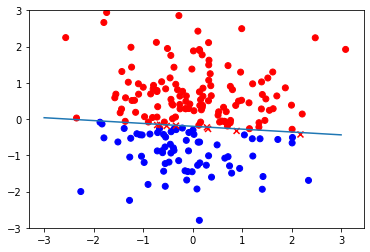

Number of iterations: 50 
Best score: 7 with weight: [-0.24523616 -0.09726815 -1.23367004]


In [11]:
Xe, y = instance_generator(200, 2)
w, num_iter, best_score = pocket( Xe, y, max_iter=50)
print('Number of iterations:', num_iter, '\nBest score:', best_score, 'with weight:', w)

We test the perceptron with the same instance:

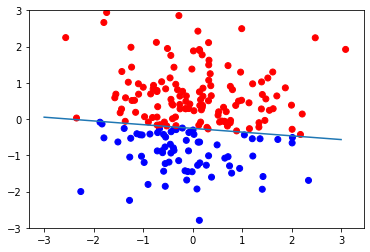

Number of iterations: 122  with weight: [-1.92804078 -0.77309764 -7.51287651]


In [12]:
w, num_iter = perceptron(Xe, y, animation=False)
print('Number of iterations:', num_iter, ' with weight:', w)